# Required Packages


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
import networkx as nx
from matplotlib import cm
import math as math
import itertools

# Short hand Methods used for time saving

In [2]:
def p(*arg): # shorthand print function 
    for i in arg:
        print(i, end = " ")
    print("")

# 1. Data Analysis of the Wines data set (30 marks total)
## Task 1.1. 
### Import the file wines.csv as a pandas dataframe. What is the highest quality score achieved by one or multiple wines in this data set? How many wines achieve such a score

In [3]:
series = pd.read_csv("wines.csv", squeeze = True) # This is a series

#making the Series more usable by splitting the variables into columns 

dfA = series.str.split(';',expand = True) #splitting each value 

#output
p(dfA.head())

     0     1     2    3      4   5   6       7     8     9    10 11
0   7.4   0.7     0  1.9  0.076  11  34  0.9978  3.51  0.56  9.4  5
1   7.8  0.88     0  2.6  0.098  25  67  0.9968   3.2  0.68  9.8  5
2   7.8  0.76  0.04  2.3  0.092  15  54   0.997  3.26  0.65  9.8  5
3  11.2  0.28  0.56  1.9  0.075  17  60   0.998  3.16  0.58  9.8  6
4   7.4   0.7     0  1.9  0.076  11  34  0.9978  3.51  0.56  9.4  5 


In [4]:
#Renaming the Columns 
df = pd.read_csv("wines.csv")
dfCols =df.columns

#splitting the values 
dfCols = dfCols.str.split(';',expand = True)

#place column names into list
ColNames = []
for i in dfCols:
    for j in i:
        #removing speach marks
        name =j.replace('"','')
        
        ColNames.append(name)

#append list variable to datafram column name  
dfA = dfA.rename(columns = {0:ColNames[0],1:ColNames[1],2:ColNames[2],3:ColNames[3],
                     4:ColNames[4],5:ColNames[5],6:ColNames[6],7:ColNames[7],
                     8:ColNames[8],9:ColNames[9],10:ColNames[10],11:ColNames[11]})

#dataframe with correct collumn names
dfA.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [5]:
#Now to answer,
#What is the highest quality score achieved by one or multiple wines in this data set?

HighestQuality = dfA[["quality"]].max()
p("The highest quality is",HighestQuality)


#How many wines achieve such a score¶

#taking only the values of the collumn "quality"
x = dfA["quality"].values

#List to append the amount of Answers in
Ans = []
for i in range(len(x)):
    if int(x[i]) == 8:
        Ans.append(i)
AmountOfMaxQualities = len(Ans)
p("The Amount of wines with quality rating maximum, 8, is ",AmountOfMaxQualities)


The highest quality is quality    8
dtype: object 
The Amount of wines with quality rating maximum, 8, is  18 


## Task 1.2. 
### Compute the mean and median quality score achieved by all wines in the data set.


In [6]:
#changing all elements to ints
dfA['quality'] = dfA['quality'].astype(int)

#find mean 
mean = dfA["quality"].mean()
#show result
p("mean of quality = ",mean)

#find median
median = dfA["quality"].median()
#show result
p("median of quality = ", median)


mean of quality =  5.6360225140712945 
median of quality =  6.0 


## Task 1.3. 
### Plot a histogram of the quality scores of all wines 

<AxesSubplot:ylabel='Frequency'>

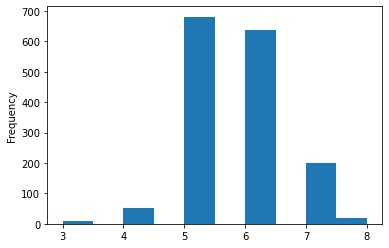

In [7]:
dfA["quality"].plot.hist()

## Task 1.4. What can you say about the relationship between the attributes fixed acidity and citric acid? What can you say about the relationship between volatile acidity and citric acid? Justify your answers. You can use plots to support your arguments

<Figure size 432x288 with 0 Axes>

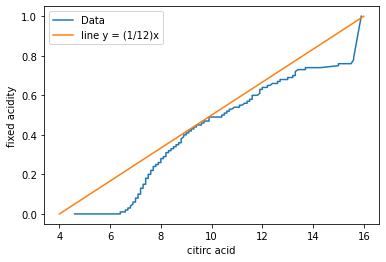

In [8]:
fig = plt.figure()

#sort the two Columns from the datafram and name them 
y = dfA["citric acid"].astype(float).sort_values(ascending = True)
x = dfA["fixed acidity"].astype(float).sort_values(ascending = True)

#Plotting 
#(side note: the line plotted is similar to the linnear reg line of the values)

fig, ax = subplots()

#plotting the sorted collumns  
ax.plot(x, y)

ax.set_xlabel("citirc acid")
ax.set_ylabel("fixed acidity")
plt.plot(np.linspace(4,16,10),np.linspace(0,1,10)) 
plt.legend(['Data','line y = (1/12)x'])
show()


### What can you say about the relationship between the attributes fixed acidity and citric acid?

As you can see the plot of Fixed acidity vs citric acid has an increasing gradient and is hence corrolated to some small degree (this plot lies closely to the line y = (1/12)x). The more Fixed acidity the more citric acid on average.

<Figure size 432x288 with 0 Axes>

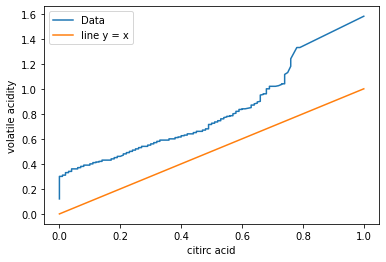

In [9]:
fig = plt.figure()

#similar process as the above cell
#soort values 
y = dfA["citric acid"].astype(float).sort_values(ascending = True)
x = dfA["volatile acidity"].astype(float).sort_values(ascending = True)

fig, ax = subplots()
#plot the values 
ax.plot(y, x)
ax.set_xlabel("citirc acid")
ax.set_ylabel("volatile acidity")
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.legend(['Data','line y = x'])
show()

### What can you say about the relationship between the attributes volatile acidity and citric acid?

As you can see the plot of volatile acidity vs citric acid has an incresing gradient and is hence corrolated to some degree (this plot lies closely to the line y = x). The gradient of the volatile acidity vs citric acid graph is much larger than the gradient of the Fixed acidity vs citric acid implying that there is a stonger relashionship between the volatile acidity and citric acid than there is Fixed acidity vs citric acid.'

## Task 1.5. 
### Construct a matrix X ∈ R n×2 where n is the number of wines in the data set. The two columns of the matrix X represent, respectively, the values of the attributes fixed acidity and volatile acidity. Also construct a vector y ∈ R n such that each entry corresponds to the value of the citric acid of a particular wine.

In [10]:
#a dataframe of fixed acidity and volatile acidity 
A = dfA[["fixed acidity","volatile acidity"]]
#convert datafram to array 
B = A.to_numpy()
#convert array to matrix
X = np.asmatrix(B)

#showing output
p(type(X))
p(X)


<class 'numpy.matrix'> 
[['7.4' '0.7']
 ['7.8' '0.88']
 ['7.8' '0.76']
 ...
 ['6.3' '0.51']
 ['5.9' '0.645']
 ['6' '0.31']] 


In [11]:
#a Series of citric acid 
CA = dfA["citric acid"]
#Convert to Array (Vector)
y = np.stack(CA)


### Given Info: In the tasks below, we will use (X, y) defined above as a data set for linear regression. X will contain our explanatory variables, while y will contain our labels.

## Task 1.6. Divide the data set (X, y) into a training and test set. The training set should contain approximately 80% of the data.

In [12]:
p(len(X))
p(len(y))

1599 
1599 


In [13]:
#both X and y have the same length. This is nice.
TrainingNum = round(0.8 * len(X))
#Training number is 1279 
TestNum = len(X) - TrainingNum
#Test Number is 320
#now to apply the values 
trainX = X[0:TrainingNum]
trainY = y[0:TrainingNum]
testX = X[TrainingNum:]
testY = y[TrainingNum:]

In [14]:
#quick check to see if the sizes are equal, and hence the above code assigned the correct sized sets.
p(TrainingNum ==len(trainX))

True 


## Task 1.7. Use scikit-learn to train a linear regression model on the training set you constructed in the previous task. In particular, this model should predict the citric acid content given fixed and volatile acidity. Evaluate this model on the test set. Discuss the performance of linear regression for this task.
 

Q: hence predict y given X

Graphical View of Data to understand

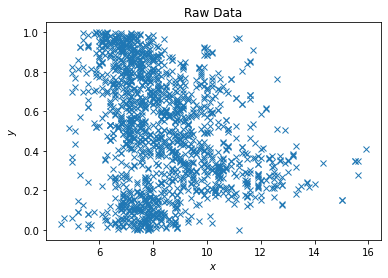

In [15]:
x = X[:,0]
plt.plot(x,np.linspace(0,1,1599),'x')
plt.title('Raw Data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

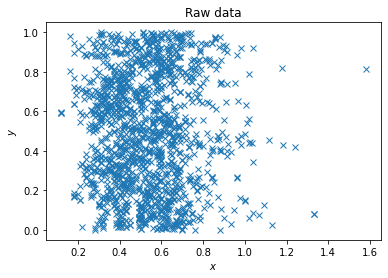

In [16]:
x = X[:,1]
plt.plot(x,np.linspace(0,1,1599),'x')
plt.title('Raw data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

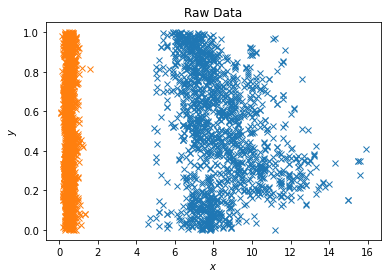

In [17]:
x = X[:,:]
plt.plot(x,np.linspace(0,1,1599),'x')
plt.title('Raw Data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Applying Linear Regression to the Data X

In [18]:
p(X.shape)
p(y.shape)


(1599, 2) 
(1599,) 


In [19]:
mdl = LinearRegression()
mdl.fit(trainX,trainY)

LinearRegression()

In [20]:
test_predictions = mdl.predict(testX)
MSETest = mean_squared_error(testY,test_predictions)
R2_score = r2_score(testY,test_predictions)
p("MSE = ",MSETest,
  "R2 score =",R2_score)

MSE =  0.015505513350040686 R2 score = 0.4587952717584064 


C:\Users\noelh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\noelh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


The preformance of linear regression can be valued in terms of the Mean Squared Error and R" score seen above. The seen mean squared error is relatively small indicating a close to true value aproximation for the linear regression model, and the R2 score is greater than 0 but below 1 impying that the model is behaving better than a naive model but is not perfect.

## Task 1.8. With the help of matplotlib, plot the prediction of your linear regression model w.r.t. the values of fixed acidity and volatile acidity. More precisely, plot a grid where the horizontal axis represents fixed acidity, the vertical axis volatile acidity, and each point (x0, x1) of the grid is coloured based on the prediction of your linear regression model for the citric acid value given fixed acidity x0 and volatile acidity x1. Choose suitable ranges and labels for the two axes. Does this plot show something interesting about the relationship between these three quantities? If so, describe your findings.

In [21]:
p(mdl.coef_)
p(mdl.intercept_)
print('Predicted linear function: f(x) = ' + str(mdl.coef_[0,]) + '*x + ' + str(mdl.intercept_))
print('Predicted linear function: g(x) = ' + str(mdl.coef_[1,]) + '*x + ' + str(mdl.intercept_))

[ 0.06383861 -0.44734323] 
-0.026080707233513356 
Predicted linear function: f(x) = 0.06383860649882135*x + -0.026080707233513356
Predicted linear function: g(x) = -0.4473432302405974*x + -0.026080707233513356


In [22]:
def MakeLinspace(array): # function to make a linspace of the array we supply
    lowerBound = int(min(y))
    upperBound = int(max(y))
    nValues = int(len(y))
    Ans = np.linspace(lowerBound,upperBound,nValues)
    return(Ans) # Ans was an np.linspace of the array supplied to the fucntion

In [23]:
yRange = MakeLinspace(y) #define np.linspace 

In [24]:
x0Range = MakeLinspace(X[:,0]) 

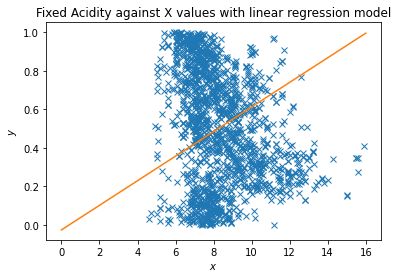

In [25]:
#Plotting against only X[:,0] values 
plt.plot(X[:,0],yRange,'x')
plt.plot([0,16],[mdl.intercept_,(16)*mdl.coef_[0,]+mdl.intercept_])

plt.title('Fixed Acidity against X values with linear regression model')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

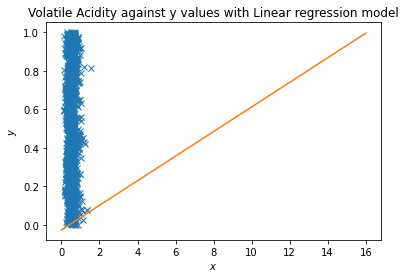

In [26]:
#Plotting agaisnt only x[:,1] values
x1Range = MakeLinspace(X[:,1])

plt.plot(X[:,1],yRange,'x')
plt.plot([0,16],[mdl.intercept_,(16)*mdl.coef_[0,]+mdl.intercept_])

plt.title('Volatile Acidity against y values with Linear regression model')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

making the plot they asked for,

More precisely, plot a grid where the horizontal axis represents fixed acidity, the vertical axis volatile acidity, and each point (x0, x1) of the grid is coloured based on the prediction of your linear regression model for the citric acid value given fixed acidity x0 and volatile acidity x1. 

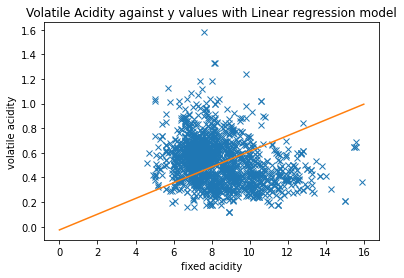

In [27]:
#Plotting the linear regression line against the values of volatile acidity and fixed
plt.plot(X[:,0],X[:,1],'x')
#labelling axis and title
plt.title('Volatile Acidity against y values with Linear regression model')
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
#adding line from linear regression 
plt.plot([0,16],[mdl.intercept_,(16)*mdl.coef_[0,]+mdl.intercept_])


### Task 1.9. Construct a data set (X2,y2) where each row of the n × 11 matrix X2 corresponds to a wine, while each column of X2 corresponds to one of the first 11 attributes contained in the file wines.csv (i.e., all attributes apart from the quality of the wines). y2 is a binary vector of zeroes and ones, where the i-th entry is equal to one if the quality of the i-th wine is at least equal to 6 (if y2[i] == 1, we say that the i-th wine is of good quality).

In [28]:
#Lets collect the Series we need from the Dataset first 

#a dataframe of fixed acidity and volatile acidity 
C = dfA[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
#convert datafram to array 
D = C.to_numpy()
#convert array to matrix
X2 = np.asmatrix(D)

#now to get the binary collumn as described for quality
E = (dfA.quality >= 6)*1 

#convert Series to array 
F = E.to_numpy()
#convert array to matrix
G = np.asmatrix(F)
y2 = np.transpose(G)


C["y2"] = E
#C is now a full dataframe of the data we wanted and the matricies, X2 and y2 have been made
p(C.head())

  fixed acidity volatile acidity citric acid residual sugar chlorides  \
0           7.4              0.7           0            1.9     0.076   
1           7.8             0.88           0            2.6     0.098   
2           7.8             0.76        0.04            2.3     0.092   
3          11.2             0.28        0.56            1.9     0.075   
4           7.4              0.7           0            1.9     0.076   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  y2  
0                  11                   34  0.9978  3.51      0.56     9.4   0  
1                  25                   67  0.9968   3.2      0.68     9.8   0  
2                  15                   54   0.997  3.26      0.65     9.8   0  
3                  17                   60   0.998  3.16      0.58     9.8   1  
4                  11                   34  0.9978  3.51      0.56     9.4   0   


In [29]:
p(X2.shape)
p(y2.shape)

(1599, 11) 
(1599, 1) 


## Task 1.10. Use a scikit-learn Nearest Neighbours classifier to distinguish good and bad quality wines. Discuss the performances of Nearest Neighbours for this task.

In [30]:
print(X2.shape)
#as we need our y2 to be a numpy array for later, we set the array for to be y2 uinstead of the matrix. 
y2 = F
print(y.shape)

(1599, 11)
(1599,)


True 
The best amount of K nearest neighbors to use is =  21 


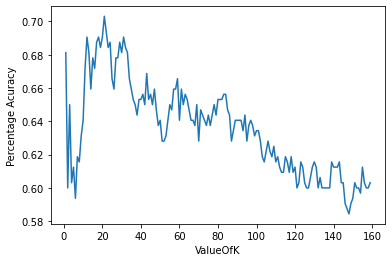

In [31]:
#as any index of X2 is the same length ...
n = X2.shape[0]
#randomise
P = np.random.permutation(n)
#get the amount of values i need for train and test 
trainNum = int(round(n*0.8))
testNum = n - trainNum
#get the actual n amount of values i need via variables above 
trainVals = P[TestNum:] #80% of the random values 
testVals = P[:TestNum] #the other bit of random numbers to be tested on 
#Find the best Value of K 

#define range of K values 
ValueOfK = []
for i in range(1,int(round(n/10))):
    ValueOfK.append(i)

#answer array for later 
PercentageAccuray = np.empty(len(ValueOfK))

for i in range(len(ValueOfK)):
    mdl = KNeighborsClassifier(n_neighbors=ValueOfK[i])
    mdl.fit(X2[trainVals],y2[trainVals])
    Prediction = mdl.predict(X2[testVals])
    if i == 0:
        p(len(Prediction)==len(y2[testVals]))
    
    #all the predictions that are correct are added and percentage is added to answer array defined above 
    PercentageAccuray[i] = sum(Prediction==y2[testVals])/testNum

#plotting 
plt.plot(ValueOfK,PercentageAccuray)
plt.xlabel('ValueOfK')
plt.ylabel('Percentage Acuracy')

#finding the best k value 
BestK = 0
for i in range(len(PercentageAccuray)):
    if PercentageAccuray[i] == max(PercentageAccuray):
        BestK = i+1

p("The best amount of K nearest neighbors to use is = ", BestK)

In [32]:
#Now we have found the besk K, lets review the K nearest neigbors prediction with n_neighbors = BestK = 1.
#train
mdl = KNeighborsClassifier(n_neighbors=BestK)
mdl.fit(X2[trainVals],y2[trainVals])
Prediction = mdl.predict(X2[:])

#defining arrays for later 
GoodWineIndexes = []
ConfirmedGoodWineIndexes = []

#finding the percentage of correct wines 
for i in range(len(Prediction)):
    if E[i] == 1: # E was the binary column for  as described for quality >=6
        ConfirmedGoodWineIndexes.append(i)
    if Prediction[i] == 1:
        GoodWineIndexes.append(i)
        

#preing resulting outputs 

p("There are ",len(GoodWineIndexes), " Good Predicted wines from the total DataSet")
p("There are ",len(ConfirmedGoodWineIndexes), " Good Confirmed wines from the total DataSet")

a = len(GoodWineIndexes)
b = len(ConfirmedGoodWineIndexes)
error = (5/855)*100
p("Percentage error = ",error, "%")

There are  847  Good Predicted wines from the total DataSet 
There are  855  Good Confirmed wines from the total DataSet 
Percentage error =  0.5847953216374269 % 


This method has proved fairly accurate with a percentage error of 0.5%, once the most accurate value for K had been found and selected.

# 2. Network Analysis (40 marks total)
This question is focussed on the manipulation and analysis of networks.
The files graph1.txt and graph2.txt contain the edge lists of two different graphs. One of them represents a network that has been synthetically generated, while the other represents a “real world” network.
In this section, you will first compute basic network quantities of the two graphs. Then, you will try to
deduce which graph represents the “real world” network and which one represents the one I synthetically
generated. Finally, you will use tools from network analysis, together with information provided in the file
la info.csv, to answer questions about demographic properties related to geographic regions of England
and Wales.


## Task 2.1. Load the graphs stored in graph1.txt and graph2.txt into two networkx Graph objects named G1 and G2, respectively.

In [33]:
G1 = nx.read_edgelist("graph1.txt", delimiter=" ")
G2 = nx.read_edgelist("graph2.txt", delimiter=" ") 

## Task 2.2. Compute the number of nodes and edges of both graphs.


In [34]:
p("G1 is a",G1)
p("G2 is a",G2)

G1 is a Graph with 350 nodes and 1842 edges 
G2 is a Graph with 350 nodes and 1851 edges 


In [35]:
#or if this is not suffcient...

print("no. edges in G1 = " + str(len(G1.edges)))
print("no. nodes in G1 = " + str(len(G1.nodes)))
print("no. edges in G2 = " + str(len(G2.edges)))
print("no. nodes in G2 = " + str(len(G2.nodes)))

no. edges in G1 = 1842
no. nodes in G1 = 350
no. edges in G2 = 1851
no. nodes in G2 = 350


## Task 2.3. How many connected components do G1 and G2 have? What is the size and diameter of the largest connected components of G1 and G2?

In [36]:
p("Connected components in G1 = ", nx.number_connected_components(G1))
p("Connected components in G2 = ", nx.number_connected_components(G2))

Connected components in G1 =  1 
Connected components in G2 =  2 


In [37]:
p("diameter of G1 is =", nx.diameter(G1))

diameter of G1 is = 4 


As there are more than one connected components in G2 we have to look at each connected component individually

In [38]:
#Find the smaller component

g2cclengths = []
for cc in nx.connected_components(G2):
    g2cclengths.append(int(len(cc)))
    
#Remove the smaller component 

for cc in list(nx.connected_components(G2)):
    if len(cc)<min(g2cclengths)+1:
        for node in cc:
            G2.remove_node(node)
            
#Now G2 has only one connected component, so we can just...

p("diameter of G2 is =", nx.diameter(G2))

diameter of G2 is = 6 


In [39]:
p("Size of G1 = ", G1.size())
p("Size of G2 = ", G2.size())

Size of G1 =  1842 
Size of G2 =  1850 


## Given info
The “real world” network has been generated as follows.

Nodes represent geographic areas associated with a local authority in England or Wales (“Bath and North East Somerset” and “City of Bristol” are examples of such local authorities).
Two nodes u and v are connected by an edge if and only if many people have moved between the two corresponding geographic areas in a certain period of time. Here, many means a number of people larger than a certain number t, which is not known to us. 

The synthetic network, instead, represents a graph sampled from the G(n, p) model, i.e., a graph of n
nodes where each pair of nodes is connected by an edge with probability p, for some p ∈ (0, 1).

## Task 2.4. Explain which of the two graphs G1 or G2 represents the real world network. Provide numerical evidence to support your answer.

### Explanation of the code to follow:
To compare the graphs, we shall use The Average Clustering Coefficient. By definition, a random synthetic network, represented by a graph sampled from the G(n, p) model, with each pair of nodes connected by an edge with probability p, for some p ∈ (0, 1). This implies that the edges are independent of each other, and knowing one edge will tell you no information about the next. However, in the "real world" network, it is NOT independent, that if one node (big city) is connected to another node (smaller city), and some third node (another smaller city) is connected to the first node (big city), we can expect the two other nodes to also be connected. 
In English, the "real world" graph will have a HIGHER betweeness Average Clustering Coefficient than the Synthetic Network. 

In [40]:
#First return the G2 graph back to the original graph by reading the file again.
G2 = nx.read_edgelist("graph2.txt", delimiter=" ")

In [41]:
p("G1 Avg Clustering Coef = ", nx.average_clustering(G1))
p("G2 Avg Clustering Coef = ", nx.average_clustering(G2))

G1 Avg Clustering Coef =  0.034961490521862024 
G2 Avg Clustering Coef =  0.5595545045947367 


G2 has a higher Average Clustering Coefficient implying that it is more representing of a "real world" netowrk.

# Given Info 
The file la info.csv contains information about the geographic areas that are represented by nodes in the
“real world” network. In particular, the i-th row of la info.csv contains information about the geographic
area represented by the i-th node in the graph. The following attributes are recorded:

Code: a string representing the code of the local authority responsible for the corresponding geographic
area;

Name: a string representing the name of the corresponding local authority;

Northing: a number representing the Northing of a reference point in the geographic area;

Easting: a number representing the Easting of a reference point in the geographic area;

Population: the number of people residing in the corresponding geographic area.

Northings and Eastings are a two-dimensional coordinate system to reference geographical places in the UK.
For example, if a place has coordinates Northing 531474 and Easting 447160, it means it is 531.474 km
north and 447.160 km east from the point that has coordinates Northing 0 Easting 0 (which is somewhere
south west of the Isles of Scilly).

Note that la info.csv contains some missing values.


## Task 2.5. Explain the relationship between the population of a geographic area and properties of the nodes of the “real world” network (such as their degree centrality). Support your answer with empirical evidence.

In [42]:
#Read Information csv into Dataframe
df = pd.read_csv("la_info.csv")
df.head()

,Unnamed: 0,Code,Name,Northing,Easting,Population
0,0,E06000001,Hartlepool,531474.0,447160.0,"93,836"
1,1,E06000002,Middlesbrough,516887.0,451141.0,"141,285"
2,2,E06000003,Redcar and Cleveland,519597.0,464361.0,"137,228"
3,3,E06000004,Stockton-on-Tees,518183.0,444940.0,"197,419"
4,4,E06000005,Darlington,515648.0,428029.0,"107,402"


In [43]:
df = df.fillna(0) #Cleaing NANs from Dataset without removing them  

## Using the data Given
To use the Data given in "la_info.csv", I intend on associating it to the Graph i found most like the real world Model, G2. Upon coding this i found it was easier to create a Third Graph, G3, of which I append the nodes from G2 with the given information from the "la_info.csv" associated to the Node. 

In [44]:
#Get the Data from each row as a Dict 

def FetchDictValues(i):
    #fetch Row from DataFrame
    row = df.iloc[[i]]
    
    #Convert Series (row), to Dictionary 
    Dict = row.to_dict()
    
    #Return Dictionary
    return(Dict)

In [45]:

#Define Variables used
masterList = []
tempTuple = ()

for i in range(len(G2.nodes())): # For every Node in the G2 network
    
    #each row fetched as dictionary
    Dict = FetchDictValues(i)
    
    #number and dict appended as tuple
    tempTuple = (i,Dict)
    
    #tuple appened to list 
    masterList.append(tempTuple)
    
#example
print("example: (masterList[5][1]['Name'])", end = " : ")
p((masterList[4][1]["Name"]))

    

example: (masterList[5][1]['Name']) : {4: 'Darlington'} 


In [46]:
#Define G3 as the graph with all the information from the la_info.csv file mapped to G2.
G3 = nx.Graph()

#Add the nodes from the Data extracted from G2 via the List, MasterList  
G3.add_nodes_from(masterList)

#Retrieve all the edges from G2 and append them to a ListOfEdges.
ListOfEdges =[]
for i in G2.edges:
    ListOfEdges.append(i)

p(ListOfEdges[0])

#For every edge in the list of edges 

for i in ListOfEdges:

    #for every two nodes, a,b, in the edge, we add the edges to G3
    a = int(i[0])
    b = int(i[1])
    
    G3.add_edge(a,b)

('0', '1') 


In [47]:
#printing outputs
p("Example to show the Graphes have the same nodes and the same edges:")
p("G3 = ",G3)
p("G2 = ",G2)

Example to show the Graphes have the same nodes and the same edges: 
G3 =  Graph with 350 nodes and 1851 edges 
G2 =  Graph with 350 nodes and 1851 edges 


Hence G3 is the inormation filled graph replica of G2

## Asess Degree Centrality

In [48]:
#Name dictionary for ease
dict_degree_centrality = nx.degree_centrality(G3)

#sort the dictionary based on item[1], which is the 'values' of the dict and hence the Degree Centrality
sortedDegCent_dict = dict(sorted(dict_degree_centrality.items(), key=lambda item: item[1]))

In [49]:
#Printing the Top 10 VALUE Nodes

#sorted_dict is a Sorted Dictionary with index of the nodes as Keys, and Values depends on the Dictionary sent in.
#String is a string allowing information for the output to make more sense 

def PrintTopTen(sorted_dict, String):

    #List to keep all the indexes of the Biggest Valued Nodes
    BiggestIndexes = []
    
    values = list(sorted_dict.values()) #list sorted smallest to largest
    values.reverse()  #list sorted largest to smallest 
    
    keys = list(sorted_dict.keys()) #list sorted smallest to largest
    keys.reverse() #list sorted largest to smallest 
    
    for i in range(0,10): #For the Top Ten Nodes 
        
        #Append the index to the List of boggest indexes 
        BiggestIndexes.append(keys[i])
        
        #Print a Fancy Output of the Node and the Value we care about 
        print("The number", i+1,"biggest", String, "is,",
              df.Name[keys[i]]," index", keys[i], "with", String, "of :", round(values[i],3) )
    
    #Return The list of Indexes we want 
    return(BiggestIndexes)

In [50]:
#Call the PrintTopTen() Function to return the List of Biggest Valued Indexes for the desrired dictionary values. 
BiggestDegCentIndexes = PrintTopTen(sortedDegCent_dict,String = "Degree Centrality")

The number 1 biggest Degree Centrality is, Birmingham  index 280 with Degree Centrality of : 0.235
The number 2 biggest Degree Centrality is, 0  index 327 with Degree Centrality of : 0.218
The number 3 biggest Degree Centrality is, Leeds  index 290 with Degree Centrality of : 0.183
The number 4 biggest Degree Centrality is, Manchester  index 259 with Degree Centrality of : 0.175
The number 5 biggest Degree Centrality is, Wandsworth  index 324 with Degree Centrality of : 0.135
The number 6 biggest Degree Centrality is, Bristol, City of  index 22 with Degree Centrality of : 0.132
The number 7 biggest Degree Centrality is, Lambeth  index 314 with Degree Centrality of : 0.115
The number 8 biggest Degree Centrality is, Ealing  index 301 with Degree Centrality of : 0.115
The number 9 biggest Degree Centrality is, Barnet  index 295 with Degree Centrality of : 0.115
The number 10 biggest Degree Centrality is, Sheffield  index 275 with Degree Centrality of : 0.115


Using these indexes we can see each corresponding city information. We should expect that the "biggest" or "most important" nodes are the ones with highest degree centrality, implying that these cities are some of the largest cities in the data set. We can check on the population data with respect to the top Degree Centrality cities. 


In [51]:
#Cleaning the Column interested in of commas and converting to int.

#Convert Column to String Values only  
df.Population = df.Population.astype(str)

#for every value in df.Population 
for i in range(len(df.Population)):
    #Remove the commas and convet the number to an int
    u = df.Population[i]
    x = int(u.replace(",",""))
    
    #assign the string value with the corrected integervalue 
    df.Population[i] = x

C:\Users\noelh\AppData\Local\Temp/ipykernel_17416/2503106700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Population[i] = x


In [52]:
#Population Data

#Define max Value of Population
MaxVal = max(df.Population)

#Sort the Column in terms of Value, highest first.
PopSorted = df.Population.sort_values(ascending = False)

#output
p(PopSorted.head())

#Cast as list 
PopSortedList = list(PopSorted)

280    1140525
290     798786
275     589214
50      573299
259     555741
Name: Population, dtype: object 


In [53]:
#Funtion used to find the location of Values of a Sorted List 
#Pop = value you are trying to find in respect to Sorted List, 
#PopSortedList = Sorted List of a value

def FindNthHighest(Pop,PopSortedList):
    for i in range(len(PopSortedList)):
        if Pop == PopSortedList[i]:
            position = i+1
            return(position)
            

In [54]:
MaxPop = PopSortedList[0]
#printing the top ten highest Degree Centrality node's populations
for i in range(len(BiggestDegCentIndexes)): #for the ton ten deg centrality nodes 
    
    CityPop = df.Population[BiggestDegCentIndexes[i]] # fetch population from the dataframe 
    
    if CityPop == str: #get rid of commas and convert to int 
        CityPop = int(CityPop.replace(",",""))    
        
    #call function to asess the ranking of the population in the whole dataset
    nthHighest = FindNthHighest(CityPop,PopSortedList)  
    
    print("Population of ", df.Name[BiggestDegCentIndexes[i]], "is", df.Population[BiggestDegCentIndexes[i]],
    "which is the number ",nthHighest," highest population out of the DataSet")

Population of  Birmingham is 1140525 which is the number  1  highest population out of the DataSet
Population of  0 is 0 which is the number  324  highest population out of the DataSet
Population of  Leeds is 798786 which is the number  2  highest population out of the DataSet
Population of  Manchester is 555741 which is the number  5  highest population out of the DataSet
Population of  Wandsworth is 329735 which is the number  28  highest population out of the DataSet
Population of  Bristol, City of is 465866 which is the number  10  highest population out of the DataSet
Population of  Lambeth is 321813 which is the number  35  highest population out of the DataSet
Population of  Ealing is 340341 which is the number  22  highest population out of the DataSet
Population of  Barnet is 399007 which is the number  12  highest population out of the DataSet
Population of  Sheffield is 589214 which is the number  3  highest population out of the DataSet


In [55]:
#code to work out the Population percnetile of which the highest degree centrality data sits in 
maxV = len(df.Population) #total areas in the data set 
val = (35/maxV)*100 # converting the highest non nan affected data on the top ten degree centrality nodes to percentage
p("The highest nine degree centrality nodes fall within the highest",val,"%   for population in the whole dataset ")


The highest nine degree centrality nodes fall within the highest 10.0 %   for population in the whole dataset  


### Conclusion
As the above cell confirms, the nodes with the highest Degree Centrality are also the very high population value (highest 10% from the whole dataset), except from the Nan outlier that has name "0", population "0". In summary these cells have correlated that nodes with highest amount of edges (highest degreee centrality) are also the nodes with high population. Which intuatively tells us that the more people live in a city, the more likely there is to be more connections with other areas. This makes complete sense when applied to the cities model.

# Task 2.6. Provide and discuss empirical evidence that proves or disproves the following hypothesis: “people tend to move between areas that are geographically close”.

## Asess Clustering Coefficient
It may prove useful to show that the Clustering Coefficient of nodes close to each other have a similar Clustering Coefficient as to aid to the example that people tend to move between areas that are geographically close.

In [56]:
#Name dictionary for ease
dict_Clustering_Coeff = nx.clustering(G3)
#sort the dictionary based on item[1], which is the 'values' of the dict and hence the Clustering Coeff.
sorted_Clustering_coeff = dict(sorted(dict_Clustering_Coeff.items(), key=lambda item: item[1])) #low to high


In [57]:
#Call the PrintTopTen() Function to return the List of Biggest Valued Indexes for the desrired dictionary values. 
BiggestClusterCoeffIndexes = PrintTopTen(sorted_Clustering_coeff,String = "Clustering Coeff")

The number 1 biggest Clustering Coeff is, Merthyr Tydfil  index 349 with Clustering Coeff of : 1.0
The number 2 biggest Clustering Coeff is, Vale of Glamorgan  index 340 with Clustering Coeff of : 1.0
The number 3 biggest Clustering Coeff is, Isle of Anglesey  index 328 with Clustering Coeff of : 1.0
The number 4 biggest Clustering Coeff is, 0  index 326 with Clustering Coeff of : 1.0
The number 5 biggest Clustering Coeff is, South Tyneside  index 278 with Clustering Coeff of : 1.0
The number 6 biggest Clustering Coeff is, Redditch  index 249 with Clustering Coeff of : 1.0
The number 7 biggest Clustering Coeff is, Worthing  index 246 with Clustering Coeff of : 1.0
The number 8 biggest Clustering Coeff is, Adur  index 240 with Clustering Coeff of : 1.0
The number 9 biggest Clustering Coeff is, 0  index 208 with Clustering Coeff of : 1.0
The number 10 biggest Clustering Coeff is, Selby  index 191 with Clustering Coeff of : 1.0


### Expectation 
Using these indexes we can see each corresponding city information. We should expect to see that the cities neighbooring (close to in location) the cities in our "BiggestClusterCoeffIndexes" list are in similar range of clustering Coeff, implying people tend to move between areas that are geographically close.  We can check on the location by reviewing the Northing and Easting data with respect to the top  Clustering Coeff cities.

In [58]:
def FindClosestCities(N,E,dfne,index): # N = Northing Value of Original City, E = Easting Value of Original City. 
    #dfne = data set containing Northing and Easting columns from df, index = index of original city(node).
    
    #List of closest three FAKE PLACEHOLDER cities containing [(index, distance),(index, distance),(index, distance)]
    #where the distance is large enough that there will definiately be a closer city to replcae the placeholder
    
    ClosestThreeCities = [(1,10**10),(2,10**10),(3,10**10)] 

    for i in dfne.index: #for every node (city) 
    
        n = df.Northing[i] #node northing value 
        e = df.Easting[i] # node easting value 
   
        TargetN = (N - n)**2 #Original - iterated node, values squared 
        TargetE = E - e #Original - iterated node, values squared 
    
        distance = ((TargetN)**2 + (TargetE)**2)**(1/2) #Pythagorean Distance of Northing and Easting to give Distance with 
        #respect to Northing and Easting
    
        for j in range(len(ClosestThreeCities)):
            if distance < ClosestThreeCities[j][1]:
            
                TempTuple = (i,distance)
            
                ClosestThreeCities.remove(ClosestThreeCities[j])
                ClosestThreeCities.append(TempTuple)
            
                break
                
    #Return List of closest cities 
    return(ClosestThreeCities)

In [59]:
N = df.Northing[0] #Northing Value of node i 
E = df.Easting[0] #EastingValue of node i

In [60]:
dfne = df[["Northing", "Easting"]]
p(dfne.isna().any())

Northing    False
Easting     False
dtype: bool 


There are no "Not a Number" Values in the dfne DataFrame 

In [61]:
#Find the Clusering Coefficient of the Top Ten Clustering Coefficient Nodes and Print Output

#List for average Clustering Coeff Values 
AverageCC = [] 
##List for Original node Clustering Coeff Values 
OriginalCC = []


for i in range(len(BiggestClusterCoeffIndexes)): #For every one of the ten highest Scoring Clustering Coefficient Nodes 
    
    #finding closest nodes
    ClosestList = [] #List of closest Areas
    
    N = df.Northing[BiggestClusterCoeffIndexes[i]] #Northing Value of node i 
    E = df.Easting[BiggestClusterCoeffIndexes[i]] #EastingValue of node i
    
    ClosestList = FindClosestCities(N,E,dfne,i) # function that finds the 2 closest nodes 
  

    
    IndexOfClosest = [] #index of the colest cities 
    for k in ClosestList: # for each of the two closest cities
        if k[0] != BiggestClusterCoeffIndexes[i]:   #if the city we are comparing to's INDEX is not the cities INDEX
            IndexOfClosest.append(k[0])  #add the unique closest city INDEX to the list 
            
            
    #handling data
    OriginalCC.append(round(dict_Clustering_Coeff[i],3)) #adding original city Clustering Coef to list for later dataframe
    Avg = (dict_Clustering_Coeff[IndexOfClosest[0]] + dict_Clustering_Coeff[IndexOfClosest[1]])/2 #standard average calculation 
    AverageCC.append(round(Avg,3)) #appedning average rounded to 3sf to list for later dataframe 
    
    
    
    #Printing output
    print("The Clustering Coeff of the Closest Two Cities to",df.Name[BiggestClusterCoeffIndexes[i]],
          
          "\n","(Clustering Coeff of",df.Name[BiggestClusterCoeffIndexes[i]],"is", round(dict_Clustering_Coeff[i],3),")"
          
          " are ", round(dict_Clustering_Coeff[IndexOfClosest[0]],3),
          "and", round(dict_Clustering_Coeff[IndexOfClosest[1]],3), end = "\n")
    p("original:", round(dict_Clustering_Coeff[i],3), ".  Average:", round(Avg,3))
    
    print("\n")

The Clustering Coeff of the Closest Two Cities to Merthyr Tydfil 
 (Clustering Coeff of Merthyr Tydfil is 1.0 ) are  0.444 and 0
original: 1.0 .  Average: 0.222 


The Clustering Coeff of the Closest Two Cities to Vale of Glamorgan 
 (Clustering Coeff of Vale of Glamorgan is 0.607 ) are  0.617 and 0.693
original: 0.607 .  Average: 0.655 


The Clustering Coeff of the Closest Two Cities to Isle of Anglesey 
 (Clustering Coeff of Isle of Anglesey is 0.5 ) are  0.476 and 0.267
original: 0.5 .  Average: 0.371 


The Clustering Coeff of the Closest Two Cities to 0 
 (Clustering Coeff of 0 is 0.607 ) are  0.397 and 0.571
original: 0.607 .  Average: 0.484 


The Clustering Coeff of the Closest Two Cities to South Tyneside 
 (Clustering Coeff of South Tyneside is 0.7 ) are  0.929 and 0.929
original: 0.7 .  Average: 0.929 


The Clustering Coeff of the Closest Two Cities to Redditch 
 (Clustering Coeff of Redditch is 0.7 ) are  0.9 and 0.667
original: 0.7 .  Average: 0.783 


The Clustering Coe

In [62]:
def FindFurthestCities(N,E,dfne,index): # N = Northing Value of Original City, E = Easting Value of Original City. 
    #dfne = data set containing Northing and Easting columns from df, index = index of original city(node).
    
    #List of closest three FAKE PLACEHOLDER cities containing [(index, distance),(index, distance),(index, distance)]
    #where the distance is SMALL enough that there will definiately be a closer city to replcae the placeholder
    
    LargestThreeCities = [(1,10),(2,10),(3,10)] 

    for i in dfne.index: #for every node (city) 
    
        n = df.Northing[i] #node northing value 
        e = df.Easting[i] # node easting value 
   
        TargetN = (N - n)**2 #Original - iterated node, values squared 
        TargetE = E - e #Original - iterated node, values squared 
    
        distance = ((TargetN)**2 + (TargetE)**2)**(1/2) #Pythagorean Distance of Northing and Easting to give Distance with 
        #respect to Northing and Easting
    
        for j in range(len(LargestThreeCities)):
            if distance > LargestThreeCities[j][1]:
            
                TempTuple = (i,distance)
            
                LargestThreeCities.remove(LargestThreeCities[j])
                LargestThreeCities.append(TempTuple)
            
                break
    #return a list of the furthest cities 
    return(LargestThreeCities)

In [63]:


AverageFurthestCC = []
PopOrig = []
for i in range(len(BiggestClusterCoeffIndexes)):
    #Finding Furthest Cities
    N = df.Northing[BiggestClusterCoeffIndexes[i]] #Northing Value of node i 
    E = df.Easting[BiggestClusterCoeffIndexes[i]] #EastingValue of node i
    FurthestList = FindFurthestCities(N,E,dfne,i) # function that finds the 2 FURTHEST nodes 

    IndexOfFurthest = [] #index of the furthest cities 
    for k in FurthestList: # for each of the two closest cities
        IndexOfFurthest.append(k[0])  #add the unique closest city INDEX to the list 
            
    Avg = (dict_Clustering_Coeff[IndexOfFurthest[0]] 
           + dict_Clustering_Coeff[IndexOfFurthest[1]])/2 #standard average calculation 
    AverageFurthestCC.append(round(Avg,3)) #appedning average rounded to 3sf to list for later dataframe 
    
    
    PopOrig.append(df.Population[BiggestClusterCoeffIndexes[i]]) # append population to list for later 
    
    #Printing output
    print("The Clustering Coeff of the Closest Two Cities to",df.Name[BiggestClusterCoeffIndexes[i]],
          
          "\n","(Clustering Coeff of",df.Name[BiggestClusterCoeffIndexes[i]],"is", round(dict_Clustering_Coeff[i],3),")"
          
          " are ", round(dict_Clustering_Coeff[IndexOfFurthest[0]],3),
          "and", round(dict_Clustering_Coeff[IndexOfFurthest[1]],3), end = "\n")
    p("original:", round(dict_Clustering_Coeff[i],3), ".  Average:", round(Avg,3))
    
    print("\n")

The Clustering Coeff of the Closest Two Cities to Merthyr Tydfil 
 (Clustering Coeff of Merthyr Tydfil is 1.0 ) are  0.929 and 0.32
original: 1.0 .  Average: 0.624 


The Clustering Coeff of the Closest Two Cities to Vale of Glamorgan 
 (Clustering Coeff of Vale of Glamorgan is 0.607 ) are  0.929 and 0.32
original: 0.607 .  Average: 0.624 


The Clustering Coeff of the Closest Two Cities to Isle of Anglesey 
 (Clustering Coeff of Isle of Anglesey is 0.5 ) are  0.397 and 0.571
original: 0.5 .  Average: 0.484 


The Clustering Coeff of the Closest Two Cities to 0 
 (Clustering Coeff of 0 is 0.607 ) are  0.929 and 0.32
original: 0.607 .  Average: 0.624 


The Clustering Coeff of the Closest Two Cities to South Tyneside 
 (Clustering Coeff of South Tyneside is 0.7 ) are  0.397 and 0.571
original: 0.7 .  Average: 0.484 


The Clustering Coeff of the Closest Two Cities to Redditch 
 (Clustering Coeff of Redditch is 0.7 ) are  0.929 and 0.32
original: 0.7 .  Average: 0.624 


The Clustering C

In [64]:
PopOrigNth =[]
#these next lines find the percentile of population for the top 10 highest degree centrality nodes.
for i in range(len(PopOrig)):#for the top ten Deg Centrality nodes associated population values 
    #find the percentile and then append to list 
    PopOrigNth.append(round((FindNthHighest(PopOrig[i],list(df.Population.sort_values(ascending = False)))/350)*100,1))
    
#outputing the list of the the percentiles of teh highest degree centrality values
print(PopOrigNth)

[89.4, 48.6, 86.9, 92.6, 39.1, 82.9, 64.3, 88.9, 92.6, 78.9]


In [65]:
#Append all the data gathered from above to a dataframe to make easy viewing

ClusterData = pd.DataFrame()
ClusterData["Original_CC"]  = OriginalCC
ClusterData["Average_Of_2_Closest"] = AverageCC
ClusterData["Average_Of_2_Furthest"] = AverageFurthestCC
ClusterData["Original_Population"] = PopOrig
ClusterData["Population_Percentile"] = PopOrigNth
ClusterData.head(10)


,Original_CC,Average_Of_2_Closest,Average_Of_2_Furthest,Original_Population,Population_Percentile
0,1.000,0.222,0.624,60424,89.4
1,0.607,0.655,0.624,135295,48.6
2,0.500,0.371,0.484,70440,86.9
3,0.607,0.484,0.624,0,92.6
4,0.700,0.929,0.484,151133,39.1
5,0.700,0.783,0.624,85568,82.9
6,0.689,0.833,0.624,110727,64.3
7,0.524,0.597,0.624,64187,88.9
8,0.600,0.484,0.624,0,92.6
9,0.762,0.733,0.484,91697,78.9


In [66]:
#Get the stats easliy of the Dataframe
ClusterData.describe()

,Original_CC,Average_Of_2_Closest,Average_Of_2_Furthest,Original_Population,Population_Percentile
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.668900,0.609100,0.582000,76947.100000,76.420000
std,0.142426,0.220643,0.067626,50178.430555,19.204791
min,0.500000,0.222000,0.484000,0.000000,39.100000
25%,0.601750,0.484000,0.519000,61364.750000,67.950000
50%,0.648000,0.626000,0.624000,78004.000000,84.900000
75%,0.700000,0.770500,0.624000,105969.500000,89.275000
max,1.000000,0.929000,0.624000,151133.000000,92.600000


### Notes
As we were choosing the data as inputted from the text file which contained NaN's that were sent to 0 in lines of code at the start, any averages with this in mind will be underestimating or equal to the value. The only data points that contained theses altered values was the first, third and Eighth Rows in the DataSet ClusteredData. Hence, if we excluse that Series from the calculations.

In [67]:
ClusterData.drop(index =0, inplace = True)
ClusterData.drop(index =3, inplace = True)
ClusterData.drop(index =8, inplace = True)
ClusterData.describe()

,Original_CC,Average_Of_2_Closest,Average_Of_2_Furthest,Original_Population,Population_Percentile
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.640286,0.700143,0.564000,101292.428571,69.942857
std,0.098851,0.182109,0.074833,32652.931578,19.721719
min,0.500000,0.371000,0.484000,64187.000000,39.100000
25%,0.565500,0.626000,0.484000,78004.000000,56.450000
50%,0.689000,0.733000,0.624000,91697.000000,78.900000
75%,0.700000,0.808000,0.624000,123011.000000,84.900000
max,0.762000,0.929000,0.624000,151133.000000,88.900000


The means of the Average columns have now increased in disparity after removing the NaN affected data.

## Asessing Betweeness Centrality

By assessing the highest ten Betweeness Centrality Nodes, we can see the edges of which are associated with the most amount of shortest paths between them. By reviewing which cities these edges are associated, we can find out whether it aids the statment  “people tend to move between areas that are geographically close". 

Intuitively, if people tend to move places that are geographically close, then there will ba a shortest path associated to the geographically close place. The highest Betweeness Centrality node will be a node with high "population flow through the city" in the graph model.

##### Test Basis
If we find that the highest Betweeness Centraility nodes are far out from the center of the data in terms of position (Northing and Easting Values) this would imply a node that has a place of interest, where many commuters from all round the country would travel to, implying “people tend to move between areas that are **NOT** geographically close". 
On the contrary, if many of the highest Betweeness Centrality nodes are central in position (Northing and Easting Values) to the rest of the Data we can assume that the node is used as a connection in their travelling pathway and hence "people tend to move between areas that **are** geographically close" as the highest betweeness centrality nodes will be used for people to complete their journey with the shortest path and hence are trying to move as geogrphically close as they can. 

In [68]:
#Name dictionary for ease
dict_Betweeness_Centrality = nx.betweenness_centrality(G3)
#sort the dictionary based on item[1], which is the 'values' of the dict.
sorted_Betw_Cent = dict(sorted(dict_Betweeness_Centrality.items(), key=lambda item: item[1])) #low to high

#Call the PrintTopTen() Function to return the List of Biggest Valued Indexes for the desrired dictionary values. 
BiggestBCI = PrintTopTen(sorted_Betw_Cent,String = "Betweeness Centrality")

#Lists to contain the data for later use in Dataframe
Names = [] 
Northing = []
Easting = []
NorthingNth = []
EastingNth = []
Populationk = []

#retrive data from Datframe where i is the index of the data we want
for i in BiggestBCI:
    Names.append(df.Name[i])
    Northing.append(df.Northing[i])
    Easting.append(df.Easting[i])
    Populationk.append(df.Population[i])
    
    EastingVal = df.Easting[i]
    NorthingVal = df.Northing[i]
    #The below to lines calculate the rounded percentage of the Easting and Northing Values for the index we care about
    #and append them to a list for later use 
    EastingNth.append(round((FindNthHighest(EastingVal, list(df.Easting.sort_values(ascending = False)))/350)*100,1))
    NorthingNth.append(round((FindNthHighest(NorthingVal,list(df.Northing.sort_values(ascending= False)))/350)*100,1))



The number 1 biggest Betweeness Centrality is, Birmingham  index 280 with Betweeness Centrality of : 0.22
The number 2 biggest Betweeness Centrality is, 0  index 327 with Betweeness Centrality of : 0.179
The number 3 biggest Betweeness Centrality is, Manchester  index 259 with Betweeness Centrality of : 0.108
The number 4 biggest Betweeness Centrality is, Leeds  index 290 with Betweeness Centrality of : 0.096
The number 5 biggest Betweeness Centrality is, Bristol, City of  index 22 with Betweeness Centrality of : 0.087
The number 6 biggest Betweeness Centrality is, Nottingham  index 17 with Betweeness Centrality of : 0.075
The number 7 biggest Betweeness Centrality is, Cambridge  index 60 with Betweeness Centrality of : 0.073
The number 8 biggest Betweeness Centrality is, Cardiff  index 341 with Betweeness Centrality of : 0.066
The number 9 biggest Betweeness Centrality is, Brighton and Hove  index 42 with Betweeness Centrality of : 0.063
The number 10 biggest Betweeness Centrality is,

In [69]:
#Feinding the Population percentage of the Highest Betweeness Centrality nodes  
PopOrigNth =[]
for i in range(len(Populationk)):
    PopOrigNth.append(round((FindNthHighest(Populationk[i],list(df.Population.sort_values(ascending = False)))/350)*100,2))
print(PopOrigNth)

[0.29, 92.57, 1.43, 0.57, 2.86, 6.57, 55.14, 4.57, 12.57, 11.43]


In [70]:
#Filling dataframe with data we collected earlier
CentralityData = pd.DataFrame()
CentralityData["Names"] = Names
CentralityData["Northing"] = Northing
CentralityData["Easting"] = Easting
CentralityData["Northing %"] = NorthingNth
CentralityData["Easting %"] = EastingNth
CentralityData["Population"] = Populationk
CentralityData["Population %"] = PopOrigNth

#applying a column to check if the Northing or Easting values fall within the central 50% of the Data
CentralityData.loc[(CentralityData['Northing %'] <= 75) & (CentralityData['Northing %'] >=25) 
                   |(CentralityData['Easting %'] <= 75) & (CentralityData['Easting %'] >=25), 'Within_Range'] = 'True'  
#Filling the Nans of the column to False if they were not set to tru in the lines above 
CentralityData["Within_Range"] = CentralityData["Within_Range"].fillna("False")
#showing output
CentralityData

,Names,Northing,Easting,Northing %,Easting %,Population,Population %,Within_Range
0,Birmingham,287352.0,408150.0,39.4,60.9,1140525,0.29,True
1,0,0.0,0.0,92.6,92.6,0,92.57,False
2,Manchester,397063.0,384591.0,17.1,68.9,555741,1.43,True
3,Leeds,436384.0,432528.0,9.7,54.3,798786,0.57,True
4,"Bristol, City of",174846.0,359990.0,69.1,75.1,465866,2.86,True
5,Nottingham,339969.0,456082.0,28.0,44.0,337098,6.57,True
6,Cambridge,257901.0,545420.0,43.1,12.9,125063,55.14,True
7,Cardiff,178887.0,315272.0,66.6,84.6,369202,4.57,True
8,Brighton and Hove,106850.0,530279.0,86.9,20.3,291738,12.57,False
9,Redbridge,189477.0,543512.0,60.0,13.4,305658,11.43,True


#### Conclusions 2.6 
After reviewing the Centrality DataFrame, you can see in most cases (excluding from the outlier in row 1), at least one of the "Northing %" or "Easting %" column data points per row are within the 25 to 75 percentile range, as can be seen in the "Within_Range" column. This indicates that the Highest Betweeness Nodes (Cities) are mostly relatively centeral and therefore implies they are a route used by a travelling path implying that "people tend to move between areas that are geographically close", as the geographically close element can be associated with shortest Path. 

#### REVIEWING DATA ANALSYS 
###### Clustering Coefficient 
We have shown that the Highest Clustering Coefficient Nodes are also in the lowest 30% for population, implying that many connections resulting in a Clustering Coefficient connection have a small population relative to the whole data set, this can mean that many of the small population nodes are represented as Villages with many small connections to neighbouring villages. The village model also implies that a small number of smallest routes flow through the edges between the villages, further implying that they have relatively lower Edge betweeness than larger Population node edges, and relatively low Betweeness Centrality for the Low Population Nodes. 

###### Betweeness Centrality 
We have shown that for 8 out of 10 of the Nodes with the highest Betweeness Centrality, they fall into the top 15% poplulation percentile and have a relatively central location (either in Northing or Easting) which tends to imply that they are being used as a connection for a shortest pathway between other nodes in the network. 

#### Conclusion
From the analysis above this concludes that “people tend to move between areas that are geographically close” this is supported by the Betweeness centrality nodes being large population cities in the central Northing and Easting Values of the Dataset acting as nodes on the Shortest pathway form many other nodes, implying that people take the shortest path when moving between areas. Furthermore, it is supported by the highest clustering coefficent nodes are the smallest Population nodes (villages) where there are few shortest pathways flowing between these small population nodes implying that there is a greater chance that should someone be travelling to a destination node of one of these small poulation high Clustering Coefficient nodes when travelling through a small population high Clustering Coefficient node.

# 3. Graphs, objects, and computational complexity 
(1) A constructor init that takes as argument a list L of positive natural numbers representing the
dimension sizes. An exception should be raised if the list has size less than one or if there exists a
number in L which is not strictly positive

In [71]:

class MultiDimGrid:#define the class 
    
    def __init__(self,L):
        
        if len(L) <= 1: #first expetion 
            raise ValueError("ValeError: Length of L is less than 1")
        else:
            for i in L: #second expetion
                if i <= 0:
                    raise ValueError("ValueError, element of L is not strictly positive")
            else:
                    self.L = L
                    
    def adj_matrix(self):
        #Matrix is a numpy matrix conversion of an networkx grid graph of the List sent in to the constructor"L"
        Matrix = nx.to_numpy_matrix(nx.grid_graph(L))
        return(Matrix)
    
    def edge_list(self): 
        #define A to be the networkx grid_graph of the List L 
        A = nx.grid_graph(L)
        #return the edges required via the networkx method A.edges
        return(A.edges)
    
    def is_equal_to(self,Object): #method with an extra argument sent in 
        
        outcome = True #define outcome to be a Boolean at the start, changed later.
        
        y = MultiDimGrid(Object) #define the object to be an instance of the MutliDimGrid Class 
        
        #define the yMat to be the numpy matrix defined by the adj_matrix method of the MutliDimGrid Class
        yMat = y.adj_matrix()  
        #define the selfMat to be the numpy matrix defined by the adj_matrix method of the self-instance of the 
        #MutliDimGrid Class
        selfMat = self.adj_matrix()
        
        #altering the outcome of the bool 
        if selfMat.all() == yMat.all(): #if all the values of the two adjacency matricies are the same
            outcome = True
        else: #else -> false 
            outcome = False
                   
        #return outcome
        return(outcome)

[[0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 1. 0.]] 
[((0, 0, 0), (1, 0, 0)), ((0, 0, 0), (0, 1, 0)), ((0, 0, 0), (0, 0, 1)), ((0, 0, 1), (1, 0, 1)), ((0, 0, 1), (0, 1, 1)), ((0, 1, 0), (1, 1, 0)), ((0, 1, 0), (0, 1, 1)), ((0, 1, 1), (1, 1, 1)), ((1, 0, 0), (1, 1, 0)), ((1, 0, 0), (1, 0, 1)), ((1, 0, 1), (1, 1, 1)), ((1, 1, 0), (1, 1, 1))] 


TypeError: 'MultiDimGrid' object is not iterable

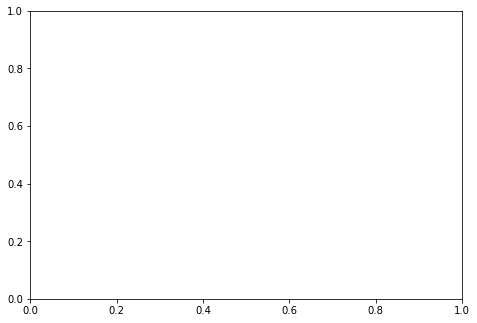

In [87]:
#show outcome 
L = [2,2,2]
X = MultiDimGrid(L)
y = X.adj_matrix()
p(y)
y = X.edge_list()
p(y)

## Task 3.2. 
### Recall the definition of the d-dimensional hypercube graph from the lecture: Define a class Hypercube that inherits from MultiDimGrid and represents d-dimensional hypercube graphs. 
### The constructor of Hypercube should take as argument the dimension of the hypercube d. Apart from the constructor, Hypercube should inherit the methods from its parent class. No other additional method needs to be added.

In [73]:
class HyperCube(MultiDimGrid): #inheritance 
    
    def __init__(self, d): #argument d being the dimention of the hypercube as asked
        self.d = d
          
    

In [74]:
#showing example
A = HyperCube(2)
A.d

2

## Task 3.3.
## What is the order of growth of the number of elops of your implementation of the four methods described in Task 3.1 (w.r.t. the number of dimensions k and the dimension sizes {m1, m2, . . . , mk} passed to the constructor)? 

### a) The order of growth of the __init__ Costructor:

###### The order of growth of the __init__ Constructor is dependent on time complexity of nx.grid_graph() and a for loop.

##### nx.grid_graph().
Let $L$ be the list of dimensions. The number of Nodes, $N_n = \prod_{i=1}^{n} (L_i) $. To simplify this we can seek the example of the List of dimensions, $L$, to be  $ L = [2,2,2,2] $, in which case this implies, by the formula, Number of Nodes for $n = 4$, is,  $N_{4} = \prod_{i = 1}^{4} (2) = 2^4$ hence for a general n we can say that the Order of growth of the amount of nodes is bounded by $max(L)^{n}$, which therefore implies that the time complexity for the amount of nodes follows an $O(log_n)$ form, more precisely $O(log_{max(L)} n)$ form.

The number of Edges $E$, can be calculated as: $E_{n} = 2(E_{n-1}) + N_{n-1} $ ,by definition. This definition if the number of Edges is reliant on the number of nodes from the previous iteration, i.e to calculate how many edges there are in 5 dimensions you use the knowledge of how many nodes there are in the $4^{th}$ dimension. Hence the amount of edges is reliant on the number of nodes which from above has shown to be an $O(log_n)$ form hence the number of edges follows a linear dependence of a  $O(log_n)$ form which can be written as  $O(Alog_n))$. This also implies the amount of edges has a  $O(log_n)$ form. 

For completeness this method has an $O(log_n)$ order of growth.

##### For loop.
Singular for loops of definite length have linear growth i.e $O(n)$

**The WHOLE __init__ constructor** relies on time complexity $O(log(n))$ and $O(n)$. Hence the WHOLE init constructor has a order of growth of $O(log(n))$

### b) The order of growth of the adj_matrix method:
The adj_matrix method is dependent on time complexity of nx.to_numpy_matrix() and nx.grid_graph().

##### nx.to_numpy_matrix() Complexity

Assuming graph has n verticies, this would imply there are $n^2$  elements of the matrix and hence to **build** the matrix with n elements would require the Time Complexity of $n^2$ (polynomial time complexity), hence Big O notation of $O(n^2)$.

Filling the matrix with either a 1 or a 0 depending on the edge being between nodes or not, would require us to fill the matrix for all pairs that exist in the n element matrix. This is given by $(v_i,v_j)$  for  $i,j$ $\in (1,...,n)$. The amount of pairs is given by $k\choose 2$ $ = ((n)(n -1))/2$. Hence the adj_matrix method even though not stated should have Big O notation of $O((n^2)+(n^2)) = 2O(n^2)$, and hence $O(n^2)$. 

##### nx.grid_graph().
As described above, the nx.grid_graph() method has an  $O(log(n))$ order of growth.

**Hence the WHOLE adj_matrix method** relies on time complexity $O(log(n))$ and $O(n^2)$.Hence the WHOLE method has $O(log(n))$ order of growth.

### c) Order of growth for the edge_list method:

###### the order of growth of the edge_list method is dependant on time complexity of nx.grid_graph() and Graph.edges().

##### nx.grid_graph()
As described above, the nx.grid_graph() method has an  $O(log(n))$ order of growth.

##### Graph.edges()
The method, .edges(), has to find the associated nodes for each edge of a graph. This is most likely done by reviewing the adjacency matrix of the graph and finding the two nodes associated to the elements of the matrix that contain "1"'s. We already know that the adjaceny matrix, adj_matrix(), is an $O(n^2)$ order of growth. Filtering through all the elements in the adjacency matrix ($M^{N,N}$ adjacency matrixes are square matricies with number of elements = $n^2$). Hence finding all elements with 1's and retrieving the nodes associated are also order of growth $O(n^2)$

There for the Graph.edges() method has an order of Growth of $O(n^2)$.

**The WHOLE method edge_list** , relies on time complexity $O(log(n))$ and $O(n^2)$. Hence the whole method can be said to grow with $O(log(n))$

### d) Order of growth of is_equal_to method()

###### the order of growth of the is_equal_to method is dependant on time complexity of the __init__ constructor, the adj_matrix() method and the python .all() method().

##### __init__ constructor

As described above, the __init__ constructor has an  $O(log(n))$ order of growth.

##### adj_matrix()

As described above, the adj_matrix() method has an  $O(log(n))$ order of growth.

#####  .all()

In the is_equal_to method, we use the .all() method to compare two adjacency matrices to test if they are the same matrices. This involves checking every element in the whole matrix and comparing it to every element in the other matrix. At most the condition must check for $2(n^2)$ elements and hence has an associated $O(n^2)$ order of growth.

**The WHOLE method is_equal_to** relies on time complexity of $O(log(n))$,$O(log(n))$ and $O(n^2))$. Hence the WHOLE method can be said to grow with $O(log(n))$

## Discuss whether the time complexity of the method adj matrix can be linear in the number of dimensions k and the dimension sizes m1, m2, . . . , mk. If yes, write an implementation with such linear time complexity if no, explain why.

### Answer: Yes.

### Implementation:

In [93]:
L = [1,1,1,1,1]
X = MultiDimGrid(L)
y = X.adj_matrix()
p(y)
y = X.edge_list()
p(X)


[[0.]] 


### Comments:
In the case that all the inputs of the list, L, are 1. We are dealing with an "n" dimensional object with a single node. 
Note from **3.3 b)** we saw a dependence of the adj_matrix method on the nx.to_numpy_matrix() which was $O(n^2)$ order of growth and also nx.grid_graph() which was $O(log(n))$ order of growth.

Notice that as all n dimensions having 1 point is implying that the singular point in all dimensions is the same point in space (origin) and as only one node exists, there can not be an edge between a node and itself.

This implies when we are accessing the $O(n^2)$ order of growth function, nx.to_numpy_matrix(), are n = 1 hence, $1^2 = 1$, which then can be seen as a linear order of growth, hence, $O(n)$, for $n = 1
$

Furthermore when we are accessing the $O(log(n))$ order of growth function, nx.grid_graph(), notice that in **3.3 a)**, we saw an $O(log_{max(L)}(n))$  form. Note for the case presented, all values of $L$ are $1$, hence the order of growth follows an $O(log_{1}(n))$ when $n \in \mathbb{z}$ and $max(L) = 1$, hence $O(log_{1}(n))$, Next notice that 
$1^n = 1,  \forall n \in \mathbb{z} $ and hence can be written as $O(n)$ for the case where $max(L) = 1$

As shown, the adj_matrix method can be written with $O(n)$ in the very specific case of $\forall i \in L, i = 1$

## Discuss whether the time complexity of the method edge list can be linear in the number of dimensions k and the dimension sizes m1, m2, . . . , mk. If yes, write an implementation with such linear time complexity; if no, explain why.

### Answer: Yes.

### Implementation:

In [76]:
L = [1,1,1,1,1]
X = MultiDimGrid(L)
y = X.adj_matrix()
p(y)
y = X.edge_list()
p(y)

[[0.]] 
[] 


### Comments:
The very similar case as the case above shown, the adj_matrix method can be written with $O(n)$ in the very specific case of $\forall i \in L, i = 1$


In the case that all the inputs of the list, L, are 1. We are dealing with an "n" dimensional object with a single node. 
Note from **3.3 b)** we saw a dependence of the edge_list method on the Graph.edges() which was $O(n^2)$ order of growth and also nx.grid_graph() which was $O(log(n))$ order of growth.

Notice that as all n dimensions having $n_{i}=1, \forall i \in {1,...,m}$, point is implying that the singular point in all dimensions is the same point in space (origin) and as only one node exists, there can not be an edge between a node and itself.

This implies when we are accessing the $O(n^2)$ order of growth function, graph.edges(), are n = 1 hence, $1^2 = 1$, which then can be seen as a linear order of growth, hence, $O(n)$, for $n = 1
$

Furthermore when we are accessing the $O(log(n))$ order of growth function, nx.grid_graph(), notice that in **3.3 a)**, we saw an $O(log_{max(L)}(n))$  form. Note for the case presented, all values of $L$ are $1$, hence the order of growth follows an $O(log_{1}(n))$ when $n \in \mathbb{z}$ and $max(L) = 1$, hence $O(log_{1}(n))$, Next notice that 
$1^n = 1,  \forall n \in \mathbb{z} $ and hence can be written as $O(n)$ for the case where $max(L) = 1$

As shown, the edge_list() method can be written with $O(n)$ in the very specific case of $\forall i \in L, i = 1$